In [48]:
import numpy as np
import matplotlib.pyplot as plt 
import allantools
from allantools import noise

In [104]:
x = allantools.noise.white(1000)
x1 = x + 2 * np.linspace(0, 1, 1000)
x1 = x + 2*np.sin(2*3.1425/500*np.linspace(0, 1000, 1000))
x2 = x + 1*np.sin(2*3.1425/500*np.linspace(0, 1000, 1000) ) + 0.5*np.sin(2*3.1425/100*np.linspace(0, 1000, 1000))

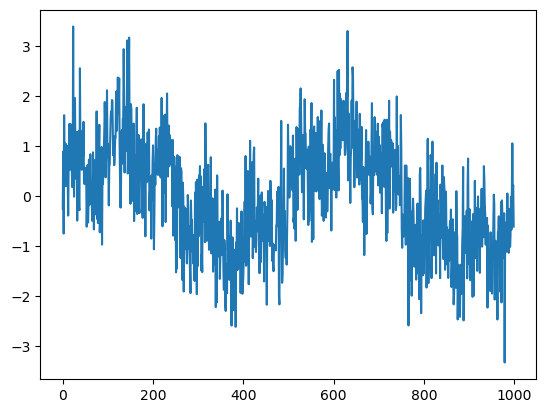

In [105]:
plt.plot(x2)
plt.show()

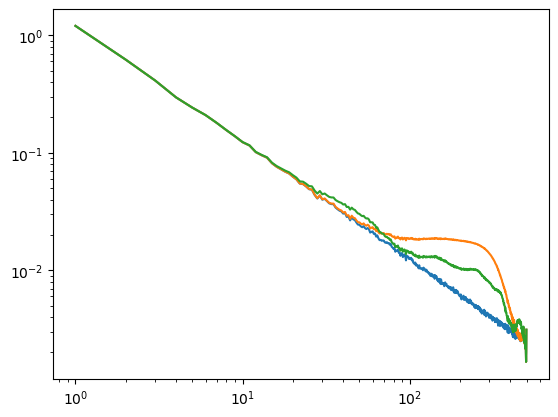

In [106]:
(taus, adevs, errors, ns) = allantools.oadev(x, taus="all")
(taus, adevs1, errors, ns) = allantools.oadev(x1,taus="all")
(taus, adevs2, errors, ns) = allantools.oadev(x2,taus="all")
plt.loglog(taus, adevs)
plt.loglog(taus, adevs1)
plt.loglog(taus, adevs2)

In [107]:
def plotallan(plt, y, rate, taus, style, label):
    (t2, ad, ade, adn) = allantools.oadev(y, rate=rate, data_type="freq", taus=taus)
    plt.loglog(t2, ad, style, label=label)


def plotallan_phase(plt, y, rate, taus, style):
    (t2, ad, ade, adn) = allantools.oadev(y, rate=rate, taus=taus)
    plt.loglog(t2, ad, style)


def plotline(plt, alpha, taus, style):
    """ plot a line with the slope alpha """
    y = [pow(tt, alpha) for tt in taus]
    plt.loglog(taus, y, style)

Done.


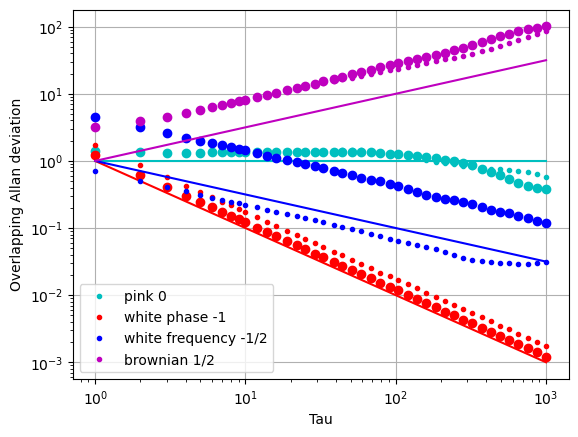

In [10]:
t = numpy.logspace(0, 3, 50)  # tau values from 1 to 1000
plt.subplot(111, xscale="log", yscale="log")
N = 10000

# pink frequency noise => constant ADEV
freq_pink = noise.pink(N)
phase_p = numpy.cumsum(noise.pink(N))  # integrate to get phase, color??
plotallan_phase(plt, phase_p, 1, t, 'co')
plotallan(plt, freq_pink, 1, t, 'c.', 'pink 0')
plotline(plt, 0, t, 'c')

# white phase noise => 1/tau ADEV
phase_white = noise.white(N)
plotallan_phase(plt, phase_white, 1, t, 'ro')
freq_w = noise.violet(N)  # diff to get frequency, "Violet noise"
plotallan(plt, freq_w, 1, t, 'r.','white phase -1')
plotline(plt, -1, t, 'r')

# white frequency modulation => 1/sqrt(tau) ADEV
freq_white = noise.white(N)
phase_rw = noise.brown(N)  # integrate to get Brownian, or random walk phase
plotallan(plt, freq_white, 1, t, 'b.','white frequency -1/2')
plotallan_phase(plt, phase_rw, 1, t, 'bo')
plotline(plt, -0.5, t, 'b')


# Brownian a.k.a random walk  frequency => sqrt(tau) ADEV
freq_rw = noise.brown(N)
phase_rw_rw = numpy.cumsum(noise.brown(N))  # integrate to get  phase
plotallan(plt, freq_rw, 1, t, 'm.','brownian 1/2')
plotallan_phase(plt, phase_rw_rw, 1, t, 'mo')
plotline(plt, +0.5, t, 'm')

plt.xlabel('Tau')
plt.ylabel('Overlapping Allan deviation')
print("Done.")
plt.grid()
plt.legend()
plt.show()